In [3]:
# Importing all libraries
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('train.csv')

In [8]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
summary_stats = df.describe()
print(summary_stats)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [15]:
# Calculate the number of missing values and percentage of missing values for each column
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine the missing values and percentages into a DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter to show only columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort the DataFrame by the percentage of missing values in descending order
missing_data_sorted = missing_data.sort_values(by='Percentage', ascending=False)

# Display the missing data information
print(missing_data_sorted)

              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtFinType2              38    2.602740
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493


In [16]:
# So, according to description.txt
# PoolQC: Pool quality	
# Ex	Excellent
# Gd	Good
# TA	Average/Typical
# Fa	Fair
# NA	No Pool
# It seemed fair to me encode the quality levels from 0 (no pool), 4 (excellent pool)

# Replace NA with 0 and encode quality levels
df['PoolQC'] = df['PoolQC'].fillna(0)  # NA becomes 0 for "No Pool"
df['PoolQC'] = df['PoolQC'].replace({
    'Fa': 1,  # Fair
    'TA': 2,  # Average/Typical
    'Gd': 3,  # Good
    'Ex': 4   # Excellent
})


In [17]:
# For MiscFeature, we do one-hot encoding, which I think makes sense

# Replace NA with 'None'
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# Apply one-hot encoding to the MiscFeature column
df = pd.get_dummies(df, columns=['MiscFeature'], prefix='MiscFeature')

In [18]:
# For alley, we do one-hot encoding again

# Replace NA with 'None' to indicate no alley access
df['Alley'] = df['Alley'].fillna('None')

# Apply one-hot encoding to the Alley column
df = pd.get_dummies(df, columns=['Alley'], prefix='Alley')


In [19]:
# for fence, we do one-hot encoding

# Replace NA with 'None' to indicate no fence
df['Fence'] = df['Fence'].fillna('None')

# Apply one-hot encoding to the Fence column
df = pd.get_dummies(df, columns=['Fence'], prefix='Fence')


In [20]:
# Replace NA with 'None' to indicate no masonry veneer
df['MasVnrType'] = df['MasVnrType'].fillna('None')

# Apply one-hot encoding to the MasVnrType column
df = pd.get_dummies(df, columns=['MasVnrType'], prefix='MasVnrType')

In [21]:
# Replace NA with 0 to indicate no fireplace
df['FireplaceQu'] = df['FireplaceQu'].fillna(0)

# Encode the quality levels
df['FireplaceQu'] = df['FireplaceQu'].replace({
    'Po': 1,  # Poor
    'Fa': 2,  # Fair
    'TA': 3,  # Average
    'Gd': 4,  # Good
    'Ex': 5   # Excellent
})

# Display the updated dataframe to check the new encoding
print(df[['FireplaceQu']].head())


   FireplaceQu
0            0
1            3
2            3
3            4
4            3


In [26]:
# GarageType

# Replace NA with 'None' to indicate no garage
df['GarageType'] = df['GarageType'].fillna('None')

# Apply one-hot encoding to the GarageType column
df = pd.get_dummies(df, columns=['GarageType'], prefix='GarageType')

KeyError: 'GarageType'

In [24]:
# Calculate the number of missing values and percentage of missing values for each column
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine the missing values and percentages into a DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter to show only columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort the DataFrame by the percentage of missing values in descending order
missing_data_sorted = missing_data.sort_values(by='Percentage', ascending=False)

# Display the missing data information
print(missing_data_sorted)

              Missing Values  Percentage
LotFrontage              259   17.739726
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493


In [27]:
# For Garage Year, I am trying to replace 0 where year is not present

# Replace NA with 0 to indicate no garage
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

# Display the updated dataframe to check the imputed values
print(df[['GarageYrBlt']].head())


   GarageYrBlt
0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0


In [32]:
df.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... MasVnrType_BrkFace MasVnrType_None  \
0            

In [34]:
# Replace NA with 0 to indicate no garage
df['GarageFinish'] = df['GarageFinish'].fillna(0)

# Encode the finish levels
df['GarageFinish'] = df['GarageFinish'].replace({
    'Unf': 1,  # Unfinished
    'RFn': 2,  # Rough Finished
    'Fin': 3   # Finished
})

# Display the updated dataframe to check the new encoding
print(df[['GarageFinish']].head())


   GarageFinish
0             2
1             2
2             2
3             1
4             2


In [35]:
# Calculate the number of missing values and percentage of missing values for each column
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine the missing values and percentages into a DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter to show only columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort the DataFrame by the percentage of missing values in descending order
missing_data_sorted = missing_data.sort_values(by='Percentage', ascending=False)

# Display the missing data information
print(missing_data_sorted)

              Missing Values  Percentage
LotFrontage              259   17.739726
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493


In [36]:
# Garage Quality!

# Replace NA with 0 to indicate no garage
df['GarageQual'] = df['GarageQual'].fillna(0)

# Encode the quality levels
df['GarageQual'] = df['GarageQual'].replace({
    'Po': 1,  # Poor
    'Fa': 2,  # Fair
    'TA': 3,  # Typical/Average
    'Gd': 4,  # Good
    'Ex': 5   # Excellent
})

# Display the updated dataframe to check the new encoding
print(df[['GarageQual']].head())


   GarageQual
0           3
1           3
2           3
3           3
4           3


In [38]:
# For Garage Condition

# Replace NA with 0 to indicate no garage
df['GarageCond'] = df['GarageCond'].fillna(0)

# Encode the condition levels
df['GarageCond'] = df['GarageCond'].replace({
    'Po': 1,  # Poor
    'Fa': 2,  # Fair
    'TA': 3,  # Typical/Average
    'Gd': 4,  # Good
    'Ex': 5   # Excellent
})

# Display the updated dataframe to check the new encoding
print(df[['GarageCond']].head())


   GarageCond
0           3
1           3
2           3
3           3
4           3


In [39]:
#For Basement Exposure

# Replace NA with 0 to indicate no basement
df['BsmtExposure'] = df['BsmtExposure'].fillna(0)

# Encode the exposure levels
df['BsmtExposure'] = df['BsmtExposure'].replace({
    'No': 1,  # No Exposure
    'Mn': 2,  # Minimum Exposure
    'Av': 3,  # Average Exposure
    'Gd': 4   # Good Exposure
})

# Display the updated dataframe to check the new encoding
print(df[['BsmtExposure']].head())


   BsmtExposure
0             1
1             4
2             2
3             1
4             3


In [40]:
# Replace NA with 0 to indicate no basement
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(0)

# Encode the finished types
df['BsmtFinType2'] = df['BsmtFinType2'].replace({
    'Unf': 1,   # Unfinished
    'LwQ': 2,   # Low Quality
    'Rec': 3,   # Average Rec Room
    'BLQ': 4,   # Below Average Living Quarters
    'ALQ': 5,   # Average Living Quarters
    'GLQ': 6    # Good Living Quarters
})

# Display the updated dataframe to check the new encoding
print(df[['BsmtFinType2']].head())


   BsmtFinType2
0             1
1             1
2             1
3             1
4             1


In [41]:
# Replace NA with 0 to indicate no basement
df['BsmtQual'] = df['BsmtQual'].fillna(0)

# Encode the quality levels
df['BsmtQual'] = df['BsmtQual'].replace({
    'Po': 1,  # Poor
    'Fa': 2,  # Fair
    'TA': 3,  # Typical
    'Gd': 4,  # Good
    'Ex': 5   # Excellent
})

# Display the updated dataframe to check the new encoding
print(df[['BsmtQual']].head())


   BsmtQual
0         4
1         4
2         4
3         3
4         4


In [42]:
# Replace NA with 0 to indicate no basement
df['BsmtCond'] = df['BsmtCond'].fillna(0)

# Encode the condition levels
df['BsmtCond'] = df['BsmtCond'].replace({
    'Po': 1,  # Poor
    'Fa': 2,  # Fair
    'TA': 3,  # Typical
    'Gd': 4,  # Good
    'Ex': 5   # Excellent
})

# Display the updated dataframe to check the new encoding
print(df[['BsmtCond']].head())


   BsmtCond
0         3
1         3
2         3
3         4
4         3


In [43]:
# Replace NA with 0 to indicate no basement
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(0)

# Encode the finished area ratings
df['BsmtFinType1'] = df['BsmtFinType1'].replace({
    'Unf': 1,   # Unfinished
    'LwQ': 2,   # Low Quality
    'Rec': 3,   # Average Rec Room
    'BLQ': 4,   # Below Average Living Quarters
    'ALQ': 5,   # Average Living Quarters
    'GLQ': 6    # Good Living Quarters
})

# Display the updated dataframe to check the new encoding
print(df[['BsmtFinType1']].head())


   BsmtFinType1
0             6
1             5
2             6
3             5
4             6


In [44]:
# Calculate the number of missing values and percentage of missing values for each column
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine the missing values and percentages into a DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter to show only columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort the DataFrame by the percentage of missing values in descending order
missing_data_sorted = missing_data.sort_values(by='Percentage', ascending=False)

# Display the missing data information
print(missing_data_sorted)

             Missing Values  Percentage
LotFrontage             259   17.739726
MasVnrArea                8    0.547945
Electrical                1    0.068493


In [47]:
# Delete the row with missing value in 'Electrical'
df.dropna(subset=['Electrical'], inplace=True)

# Display the updated dataframe to confirm deletion
print(df['Electrical'].isna().sum())
print(df.shape)


0
(1459, 100)


In [48]:
# Delete the row with missing value in 'Electrical'
df.dropna(subset=['MasVnrArea'], inplace=True)

# Display the updated dataframe to confirm deletion
print(df['MasVnrArea'].isna().sum())
print(df.shape)


0
(1451, 100)


In [49]:
# Calculate the number of missing values and percentage of missing values for each column
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine the missing values and percentages into a DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter to show only columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort the DataFrame by the percentage of missing values in descending order
missing_data_sorted = missing_data.sort_values(by='Percentage', ascending=False)

# Display the missing data information
print(missing_data_sorted)

             Missing Values  Percentage
LotFrontage             257   17.711923


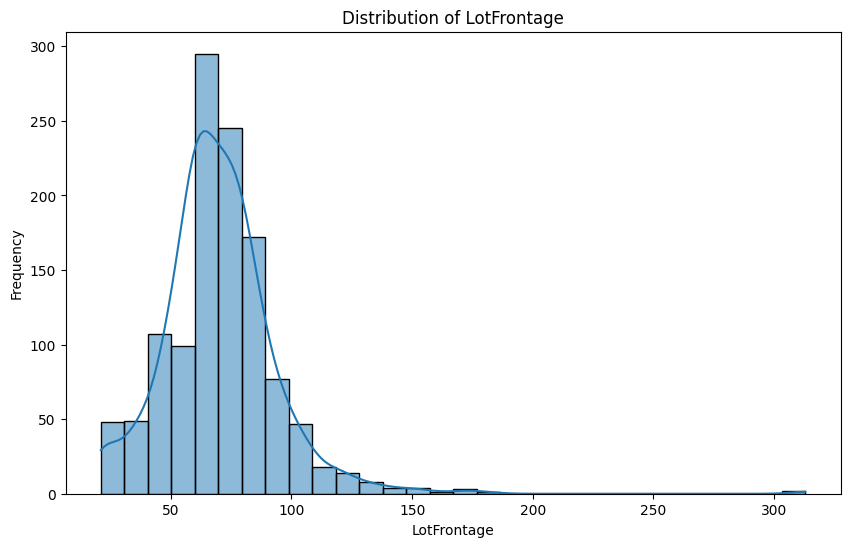

Correlation between LotFrontage and LotArea:
              LotFrontage   LotArea
LotFrontage     1.000000  0.425537
LotArea         0.425537  1.000000


In [50]:
# For LotFrontage, let us analyze the dataset to insert values

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of LotFrontage
plt.figure(figsize=(10, 6))
sns.histplot(df['LotFrontage'].dropna(), bins=30, kde=True)
plt.title('Distribution of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

# Check the correlation between LotFrontage and LotArea
correlation = df[['LotFrontage', 'LotArea']].corr()
print("Correlation between LotFrontage and LotArea:\n", correlation)


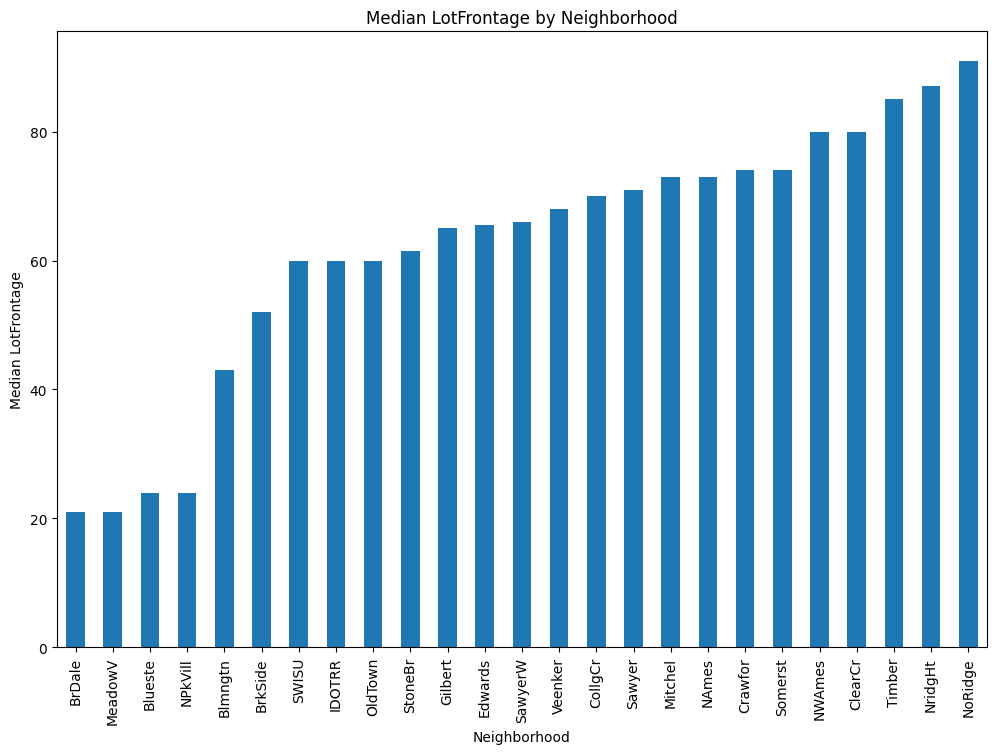

In [51]:
# Calculate the median LotFrontage for each Neighborhood
lotfrontage_by_neighborhood = df.groupby('Neighborhood')['LotFrontage'].median().sort_values()

# Plot the median LotFrontage by Neighborhood
plt.figure(figsize=(12, 8))
lotfrontage_by_neighborhood.plot(kind='bar')
plt.title('Median LotFrontage by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Median LotFrontage')
plt.show()


In [52]:
# Impute missing LotFrontage values with the median LotFrontage for each Neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Verify there are no more missing values in LotFrontage
print(df['LotFrontage'].isna().sum())


0


In [53]:
# Export the cleaned dataframe to an Excel file
df.to_csv('cleaned_train.csv', index=False)


In [54]:
# Calculate the number of missing values and percentage of missing values for each column
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine the missing values and percentages into a DataFrame for better visualization
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter to show only columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort the DataFrame by the percentage of missing values in descending order
missing_data_sorted = missing_data.sort_values(by='Percentage', ascending=False)

# Display the missing data information
print(missing_data_sorted)

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [55]:
# Generate descriptive statistics for numerical columns
numerical_summary = df.describe()

# Display the summary statistics
print(numerical_summary)


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1451.000000  1451.000000  1451.000000    1451.000000  1451.000000   
mean    729.374225    56.933150    70.181599   10507.808408     6.093728   
std     421.737858    42.350366    22.450672    9992.987081     1.381467   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     364.500000    20.000000    60.000000    7537.500000     5.000000   
50%     729.000000    50.000000    70.000000    9477.000000     6.000000   
75%    1094.500000    70.000000    80.000000   11600.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd  MasVnrArea     BsmtQual  ...  \
count  1451.000000  1451.000000   1451.000000  1451.00000  1451.000000  ...   
mean      5.579600  1971.092350   1984.760165   103.75672     3.485872  ...   
std       1.113415    30.190266     20.651334   181.10815     0.877481  ...   

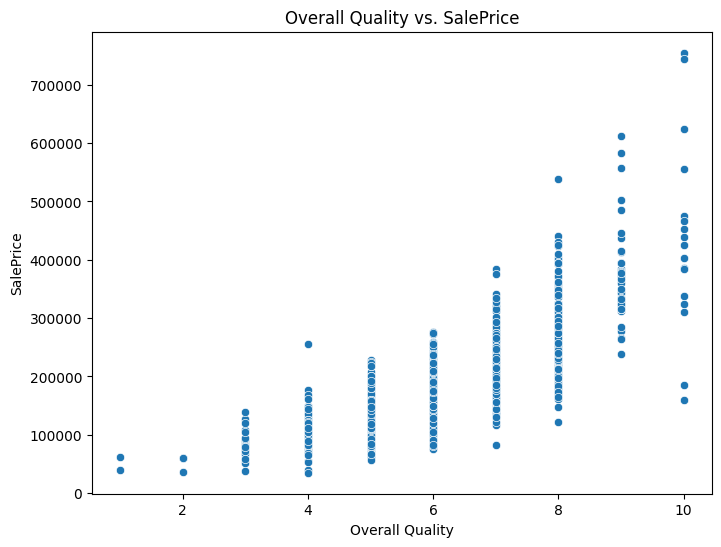

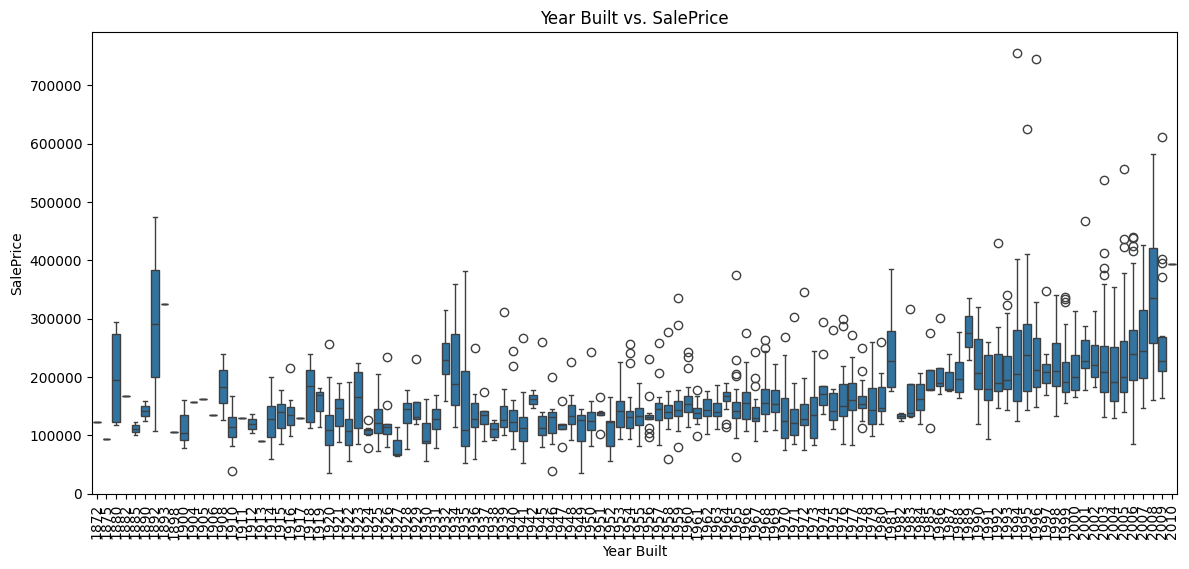

In [57]:
# Scatter plot to visualize relationship between OverallQual and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')
plt.title('Overall Quality vs. SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

# Box plot to visualize relationship between YearBuilt and SalePrice
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='YearBuilt', y='SalePrice')
plt.xticks(rotation=90)
plt.title('Year Built vs. SalePrice')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.show()


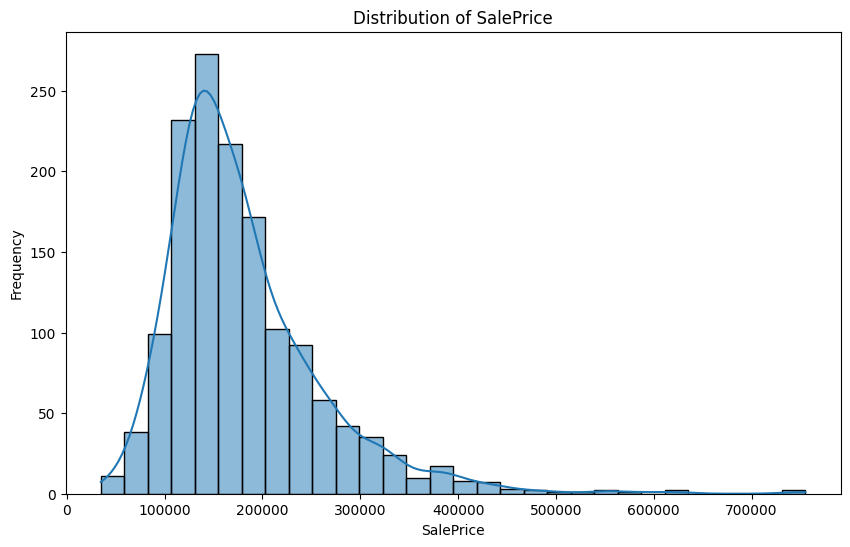

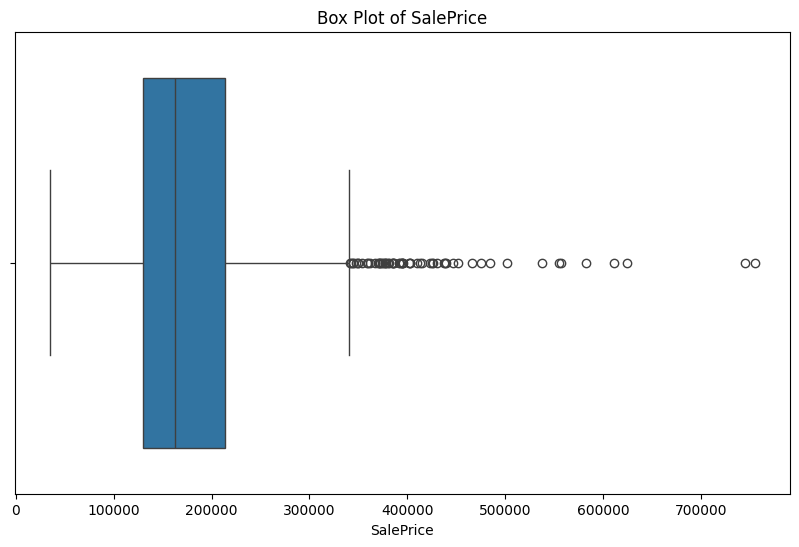

In [58]:
# Analyze target variable 

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualize the Distribution of SalePrice

# Histogram of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Box plot of SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.xlabel('SalePrice')
plt.show()


Skewness of SalePrice: 1.88


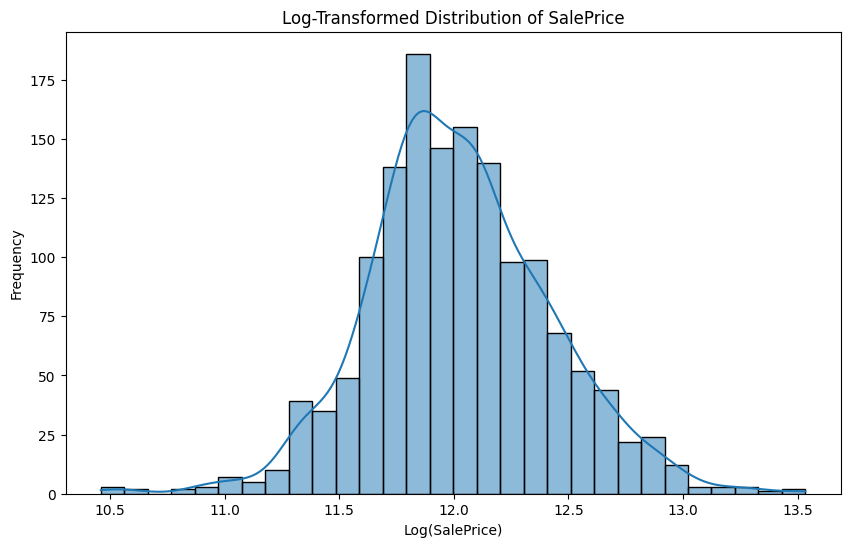

In [59]:
from scipy.stats import skew

# Calculate skewness
saleprice_skew = skew(df['SalePrice'])
print(f'Skewness of SalePrice: {saleprice_skew:.2f}')

# Apply log transformation if necessary
if saleprice_skew > 0.5:  # A threshold to decide if transformation is needed
    df['LogSalePrice'] = np.log(df['SalePrice'])
    
    # Plot the distribution after log transformation
    plt.figure(figsize=(10, 6))
    sns.histplot(df['LogSalePrice'], bins=30, kde=True)
    plt.title('Log-Transformed Distribution of SalePrice')
    plt.xlabel('Log(SalePrice)')
    plt.ylabel('Frequency')
    plt.show()


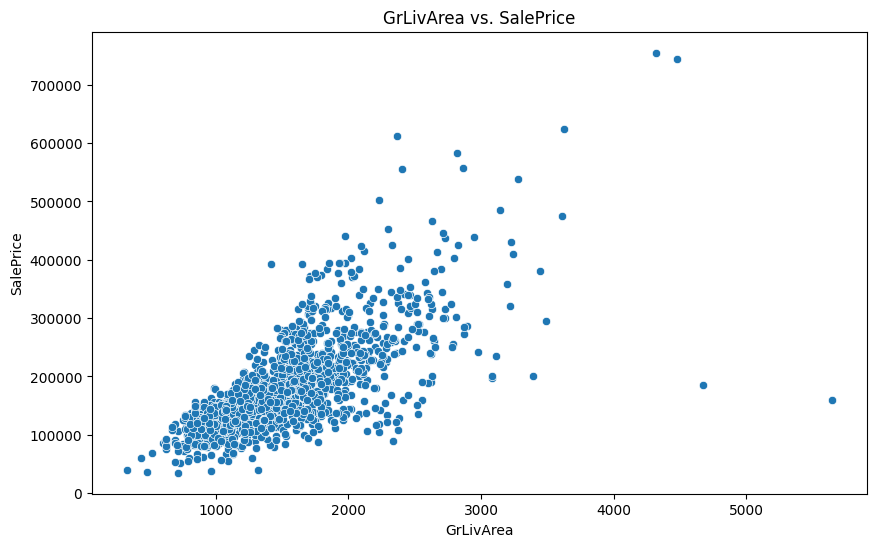

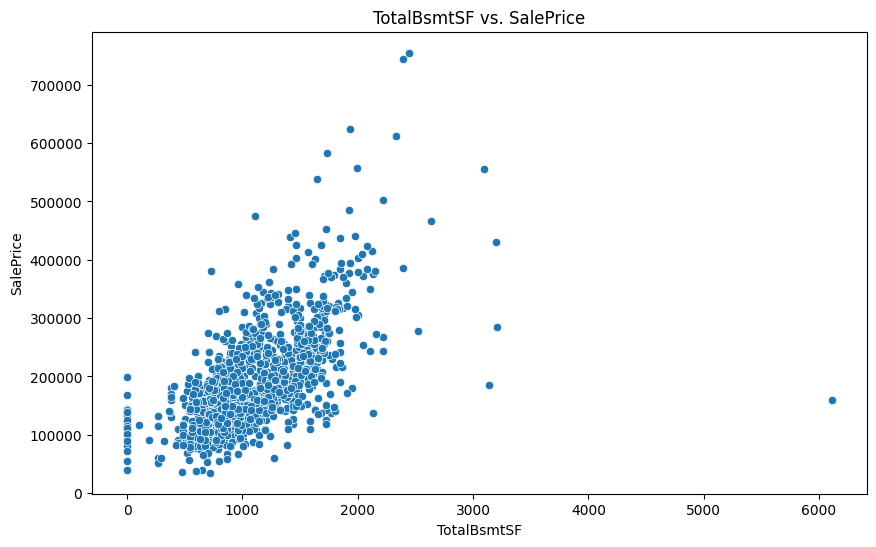

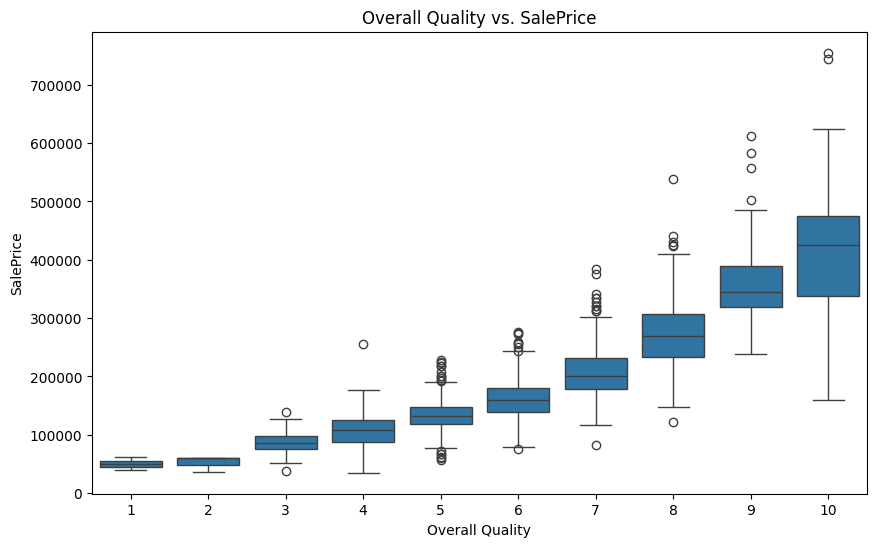

In [60]:
# Scatter plot to visualize relationship between GrLivArea and SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('GrLivArea vs. SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot to visualize relationship between TotalBsmtSF and SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TotalBsmtSF'], y=df['SalePrice'])
plt.title('TotalBsmtSF vs. SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

# Box plot to visualize relationship between OverallQual and SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('Overall Quality vs. SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()


In [61]:
# Log-transform SalePrice for better normality
df['LogSalePrice'] = np.log(df['SalePrice'])

# Save the transformed dataset
df.to_csv('transformed_train.csv', index=False)


In [68]:
# Feature Engineering 

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assume df is your cleaned dataframe
# Use LogSalePrice as the target variable
y = np.log(df['SalePrice'])  # Target variable is the log of SalePrice

# Drop SalePrice and LogSalePrice from features
X = df.drop(['SalePrice', 'LogSalePrice'], axis=1)  # Features

# Encode categorical variables if not already encoded
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Check data types to ensure all are numeric
print(X.dtypes)



Id                      int64
MSSubClass              int64
MSZoning                int32
LotFrontage           float64
LotArea                 int64
                       ...   
GarageType_Basment       bool
GarageType_BuiltIn       bool
GarageType_CarPort       bool
GarageType_Detchd        bool
GarageType_None          bool
Length: 99, dtype: object


In [69]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [70]:
# Get feature importances
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(20))


              Feature  Importance
16        OverallQual    0.424561
58         GarageCars    0.129529
39         CentralAir    0.040400
97  GarageType_Detchd    0.037246
44          GrLivArea    0.033222
60         GarageQual    0.031984
57       GarageFinish    0.024811
36        TotalBsmtSF    0.019930
55        FireplaceQu    0.018667
51        KitchenQual    0.018183
25          ExterQual    0.016481
54         Fireplaces    0.012284
28           BsmtQual    0.010435
17        OverallCond    0.009907
2            MSZoning    0.009764
32         BsmtFinSF1    0.009570
7         LandContour    0.009519
47           FullBath    0.009442
59         GarageArea    0.008638
50       KitchenAbvGr    0.008571


In [71]:
# Select the top 20 features based on importance
top_features = importance_df.head(20)['Feature'].tolist()
print("Top 20 features:", top_features)


Top 20 features: ['OverallQual', 'GarageCars', 'CentralAir', 'GarageType_Detchd', 'GrLivArea', 'GarageQual', 'GarageFinish', 'TotalBsmtSF', 'FireplaceQu', 'KitchenQual', 'ExterQual', 'Fireplaces', 'BsmtQual', 'OverallCond', 'MSZoning', 'BsmtFinSF1', 'LandContour', 'FullBath', 'GarageArea', 'KitchenAbvGr']


In [72]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume df is your cleaned dataframe
# Use LogSalePrice as the target variable
y = np.log(df['SalePrice'])  # Log transform the target variable

# Select only the top features for modeling
X_top = df[top_features]  # Use top features selected with XGBoost

# Ensure all features are numeric (if not already encoded)
X_top = pd.get_dummies(X_top)


In [73]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_top, y, test_size=0.2, random_state=42)


In [74]:
# Train an XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [75]:
# Predict on the validation set
y_pred_log = model.predict(X_val)


In [76]:
# Calculate RMSE for log-transformed predictions
rmse_log = np.sqrt(mean_squared_error(y_val, y_pred_log))
print(f"RMSE (log-transformed): {rmse_log:.4f}")


RMSE (log-transformed): 0.1300


In [78]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    param = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'random_state': 42
    }

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_top, y, test_size=0.2, random_state=42)

    # Train the model
    model = XGBRegressor(**param)
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred_log = model.predict(X_val)

    # Calculate RMSE for log-transformed predictions
    rmse_log = np.sqrt(mean_squared_error(y_val, y_pred_log))
    return rmse_log


C:\Users\yashw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [79]:
# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=50)  # You can increase the number of trials for better results

# Display the best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best RMSE (log-transformed): ", study.best_value)


[I 2024-08-31 21:39:32,914] A new study created in memory with name: no-name-56b5c09c-b107-4f73-a35c-5edca85173c5
C:\Users\yashw\AppData\Local\Temp\ipykernel_20636\344250611.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\yashw\AppData\Local\Temp\ipykernel_20636\344250611.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
C:\Users\yashw\AppData\Local\Temp\ipykernel_20636\344250611.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

Best hyperparameters:  {'n_estimators': 390, 'max_depth': 4, 'learning_rate': 0.029030563989084816, 'colsample_bytree': 0.9960442739096274, 'subsample': 0.9520078727332486, 'alpha': 3.221470449707067e-05, 'lambda': 0.0005742562582400615}
Best RMSE (log-transformed):  0.11768537363394534


In [80]:
# Get the best hyperparameters from the study
best_params = study.best_params

# Train the final model using the best hyperparameters
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Predict on the validation set using the final model
y_pred_log_final = final_model.predict(X_val)

# Calculate final RMSE
rmse_log_final = np.sqrt(mean_squared_error(y_val, y_pred_log_final))
print(f"Final RMSE (log-transformed) with tuned hyperparameters: {rmse_log_final:.4f}")


Final RMSE (log-transformed) with tuned hyperparameters: 0.1200


In [85]:
# Running Cross Validation

from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Use X_top (top features) and y (log-transformed SalePrice) from previous steps

y = np.log(df['SalePrice'])  # Log transform the target variable

# Select only the top features for modeling
X_top = df[top_features]  # Use top features selected with XGBoost


# Ensure all features are numeric (if not already encoded)
X_top = pd.get_dummies(X_top)


In [86]:
# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [87]:
# Use XGBoost model with the best hyperparameters found by Optuna
best_params = study.best_params
model = XGBRegressor(**best_params)

# Use cross_val_score to calculate RMSE for each fold
rmse_log_scores = cross_val_score(model, X_top, y, scoring='neg_root_mean_squared_error', cv=kf)

# Convert negative RMSE to positive
rmse_log_scores = -rmse_log_scores


In [88]:
# Calculate mean and standard deviation of RMSE
mean_rmse_log = np.mean(rmse_log_scores)
std_rmse_log = np.std(rmse_log_scores)

print(f"Mean RMSE (log-transformed): {mean_rmse_log:.4f}")
print(f"Standard Deviation of RMSE (log-transformed): {std_rmse_log:.4f}")


Mean RMSE (log-transformed): 0.1359
Standard Deviation of RMSE (log-transformed): 0.0182


In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the test data
test_df = pd.read_csv('test.csv')

# Apply the same preprocessing steps as training data

# PoolQC: Encode quality levels from 0 (no pool) to 4 (excellent pool)
test_df['PoolQC'] = test_df['PoolQC'].fillna(0)  # NA becomes 0 for "No Pool"
test_df['PoolQC'] = test_df['PoolQC'].replace({'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

# MiscFeature: One-hot encoding
test_df['MiscFeature'] = test_df['MiscFeature'].fillna('None')
test_df = pd.get_dummies(test_df, columns=['MiscFeature'], prefix='MiscFeature')

# Alley: One-hot encoding
test_df['Alley'] = test_df['Alley'].fillna('None')
test_df = pd.get_dummies(test_df, columns=['Alley'], prefix='Alley')

# Fence: One-hot encoding
test_df['Fence'] = test_df['Fence'].fillna('None')
test_df = pd.get_dummies(test_df, columns=['Fence'], prefix='Fence')

# MasVnrType: One-hot encoding
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')
test_df = pd.get_dummies(test_df, columns=['MasVnrType'], prefix='MasVnrType')

# FireplaceQu: Encode quality levels from 0 (no fireplace) to 5 (excellent)
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna(0)
test_df['FireplaceQu'] = test_df['FireplaceQu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

# GarageType: One-hot encoding
test_df['GarageType'] = test_df['GarageType'].fillna('None')
test_df = pd.get_dummies(test_df, columns=['GarageType'], prefix='GarageType')

# GarageYrBlt: Replace NA with 0
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(0)

# GarageFinish: Encode finish levels from 0 (no garage) to 3 (finished)
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(0)
test_df['GarageFinish'] = test_df['GarageFinish'].replace({'Unf': 1, 'RFn': 2, 'Fin': 3})

# GarageQual: Encode quality levels from 0 (no garage) to 5 (excellent)
test_df['GarageQual'] = test_df['GarageQual'].fillna(0)
test_df['GarageQual'] = test_df['GarageQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

# GarageCond: Encode condition levels from 0 (no garage) to 5 (excellent)
test_df['GarageCond'] = test_df['GarageCond'].fillna(0)
test_df['GarageCond'] = test_df['GarageCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

# BsmtExposure: Encode exposure levels from 0 (no basement) to 4 (good exposure)
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(0)
test_df['BsmtExposure'] = test_df['BsmtExposure'].replace({'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})

# BsmtFinType2: Encode finished types from 0 (no basement) to 6 (good living quarters)
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna(0)
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].replace({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

# BsmtQual: Encode quality levels from 0 (no basement) to 5 (excellent)
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(0)
test_df['BsmtQual'] = test_df['BsmtQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

# BsmtCond: Encode condition levels from 0 (no basement) to 5 (excellent)
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(0)
test_df['BsmtCond'] = test_df['BsmtCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

# BsmtFinType1: Encode finished area ratings from 0 (no basement) to 6 (good living quarters)
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(0)
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].replace({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

# Impute missing LotFrontage values with the median LotFrontage for each Neighborhood
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Encode categorical variables if not already encoded
for col in test_df.select_dtypes(include=['object']).columns:
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

# Align columns between test and train datasets
missing_cols = set(X_top.columns) - set(test_df.columns)
for c in missing_cols:
    test_df[c] = 0
test_df = test_df[X_top.columns]

# Save the cleaned test dataframe
test_df.to_csv('cleaned_test.csv', index=False)


In [91]:
# Load the preprocessed test data
test_df = pd.read_csv('cleaned_test.csv')


In [92]:
# Use the trained model to predict on the test set
y_test_pred_log = final_model.predict(test_df)

# Convert log-transformed predictions back to the original scale
y_test_pred = np.exp(y_test_pred_log)


In [95]:
# Create a DataFrame for submission
submission = pd.DataFrame({'SalePrice': y_test_pred})

# Save to CSV for Kaggle submission
submission.to_csv('submission.csv', index=False)
